# Agenda
- What is Regression
- Applications of Regression
- Types of Regression
    - Linear Regression
        - Simple Linear Regression
        - Multiple Linear Regression
    - Polynomial Regression
    - Logistic Regression
    - Support Vector Regression
    - Decision Tree Regression
    - Random Forest Regression
    - Ridge Regression 
    - Lasso Regression
- MultiCollinearity
- Evaluation Metrics of Regression
- OverSampling Using SMOTE

#What is Regression

It is a supervised ML technique that is used to predict a continuous value based on a set of input values. That implies the target variable is always a continuos value in regression. regrssion tries to establish a relationship between input variable x and the target variable y

Applications of Regression

Almost every industry


# Linear Regression

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
X = np.random.randint(1,10, size = (100,))
y = X +  np.random.randint(1,5, size = (100,))

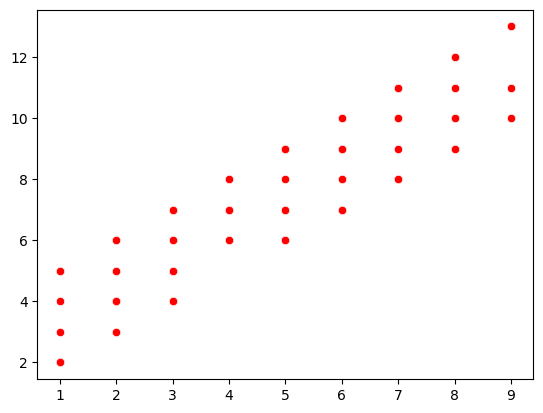

In [6]:
sns.scatterplot(x= X, y=y, color = 'red')
plt.show()

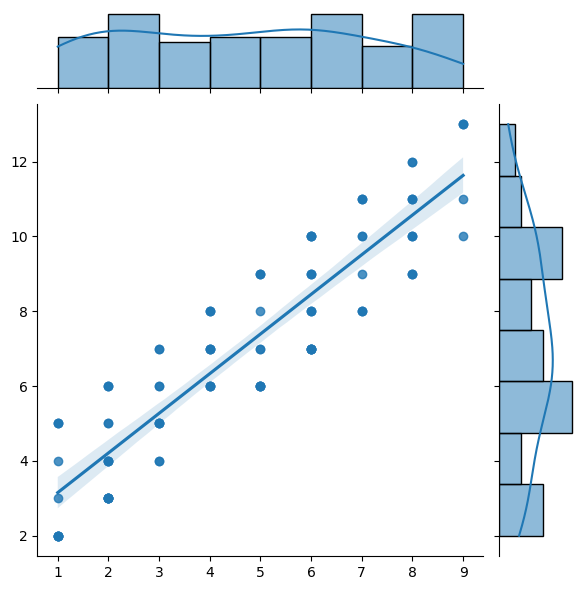

In [7]:
sns.jointplot(x= X, y=y, kind = 'reg')
plt.show()

The prediction line in linear regression is represented as

$y_p= \beta_0 + \beta_1X$  -- Simple Linear Regression ( Case where there in only one input variable)<br><br>
$y_p= \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_3+...+ \beta_nX_n$ -- Multiple Linear Regression(More than one input variable<br><br>

<br><br>
where $ \beta_0$ is the intercept for the line or the plane or hyperplane and $\beta_n $represents the slope(Coefficient of Regression) of the respective variable w.r.t the target

In [9]:
y

array([ 6,  7,  6,  7,  6, 10,  9,  7,  4,  8,  9,  6,  8, 13,  5,  6,  7,
       11, 10,  8,  2,  7,  7, 10,  2, 10,  3,  8, 13,  3,  5,  3,  6, 11,
        3,  4,  9, 12,  4, 10,  8, 12,  8,  3,  9,  9,  6,  6,  5,  7, 13,
        6,  7, 11,  4, 10,  7,  4,  4,  4,  8,  3,  9,  7,  8,  6,  5,  3,
        7,  6,  2,  5,  6,  2,  8,  3,  5,  9,  7, 10,  9,  7, 10,  8, 11,
       11,  9,  5,  6, 11, 10,  7,  2,  5, 10, 11,  5,  6,  9,  2])

# Apply Linear Regression (Simple)

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [12]:
df = pd.read_csv('position_salaries.csv')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [14]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [15]:
X = df.iloc[:,1:2]
y = df.iloc[:,2]

In [16]:
xtrain, xtest, ytrain, ytest= train_test_split(X,y, test_size =0.2, random_state = 25)

In [17]:
xtest

,Level
5,6
1,2


In [18]:
lr = LinearRegression()

In [19]:
lr.fit(xtrain, ytrain)

LinearRegression()

In [20]:
lr.coef_, lr.intercept_

(array([85834.84573503]), -217404.71869328484)

In [21]:
lr.predict(xtest)

array([297604.35571688, -45735.02722323])

In [22]:
ytest

5    150000
1     50000
Name: Salary, dtype: int64

In [23]:
lr.predict(xtrain)

array([ 125934.66424682,  555108.89292196, -131569.87295826,
         40099.8185118 ,  640943.73865699,  469274.04718693,
        383439.20145191,  211769.50998185])

In [24]:
np.sqrt(mean_squared_error(ytrain, lr.predict(xtrain)))

172591.2788824496

In [25]:
np.sqrt(mean_squared_error(ytest, lr.predict(xtest)))

124403.05716506214

In [26]:
from sklearn.metrics import r2_score

In [27]:
r2_score(ytest, lr.predict(xtest))

-5.190448252805487

In [28]:
r2_score(ytrain, lr.predict(xtrain))

0.6804519008272936

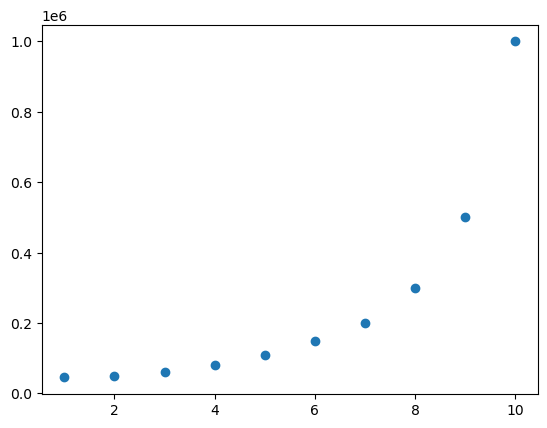

In [29]:
plt.scatter(X,y)
plt.show()

In [30]:
xtrain.values.flatten()

array([ 4,  9,  1,  3, 10,  8,  7,  5], dtype=int64)

In [31]:
# Polynomial Regression

In [32]:
from sklearn.preprocessing import PolynomialFeatures

In [33]:
polyf = PolynomialFeatures(degree= 6)
polyf.fit(X)
poly_X =  polyf.transform(X)

In [34]:
poly_X.astype(int)

array([[      1,       1,       1,       1,       1,       1,       1],
       [      1,       2,       4,       8,      16,      32,      64],
       [      1,       3,       9,      27,      81,     243,     729],
       [      1,       4,      16,      64,     256,    1024,    4096],
       [      1,       5,      25,     125,     625,    3125,   15625],
       [      1,       6,      36,     216,    1296,    7776,   46656],
       [      1,       7,      49,     343,    2401,   16807,  117649],
       [      1,       8,      64,     512,    4096,   32768,  262144],
       [      1,       9,      81,     729,    6561,   59049,  531441],
       [      1,      10,     100,    1000,   10000,  100000, 1000000]])

In [35]:
poly_reg =  LinearRegression()
poly_reg.fit(poly_X, y)

LinearRegression()

In [36]:
poly_reg.predict(poly_X)

array([ 45190.55943813,  49086.82983497,  61383.44988351,  79877.62237762,
       108808.85780803, 149282.05128119, 203940.55944048, 295889.27738951,
       501867.71561782, 999673.07692873])

In [37]:
y.values.flatten()

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

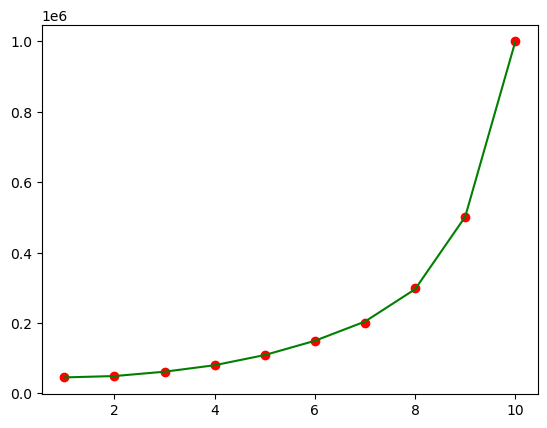

In [38]:
plt.scatter(X, y, color = 'red')
plt.plot(X, poly_reg.predict(poly_X), color = 'green')
plt.show()

In [39]:
testinput = polyf.transform([[11]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [40]:
poly_reg.predict(testinput)

array([2129833.3333695])

In [41]:
poly_reg.coef_

array([ 0.00000000e+00, -8.29439977e+04,  6.58964015e+04, -2.43819566e+04,
        4.92908654e+03, -4.95432692e+02,  1.97916667e+01])

In [42]:
poly_reg.intercept_

82166.66667932179

In [43]:
dir(datasets)

NameError: name 'datasets' is not defined

In [ ]:
from sklearn import datasets

In [ ]:
<dataframe>.to_csv("filename.csv")

# Logistic Regression

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
x= np.random.randint(1,10,size = (100,))
y= np.random.randint(0,2,size = (100,))


In [54]:
x

array([2, 6, 2, 7, 3, 9, 7, 6, 5, 1, 5, 8, 6, 5, 9, 1, 3, 6, 4, 9, 1, 3,
       9, 2, 4, 1, 4, 5, 4, 4, 9, 5, 9, 3, 5, 9, 1, 9, 6, 4, 2, 2, 8, 6,
       3, 1, 9, 6, 9, 7, 9, 4, 4, 7, 7, 4, 1, 6, 5, 1, 7, 1, 4, 3, 3, 5,
       4, 9, 5, 1, 1, 5, 8, 4, 5, 2, 9, 2, 1, 3, 5, 1, 2, 5, 3, 3, 9, 3,
       1, 9, 1, 1, 1, 1, 3, 2, 3, 7, 4, 1])

In [55]:
y

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0])

In [56]:
ysig = 1/(1+np.e**(-x))

In [57]:
ysig

array([0.88079708, 0.99752738, 0.88079708, 0.99908895, 0.95257413,
       0.99987661, 0.99908895, 0.99752738, 0.99330715, 0.73105858,
       0.99330715, 0.99966465, 0.99752738, 0.99330715, 0.99987661,
       0.73105858, 0.95257413, 0.99752738, 0.98201379, 0.99987661,
       0.73105858, 0.95257413, 0.99987661, 0.88079708, 0.98201379,
       0.73105858, 0.98201379, 0.99330715, 0.98201379, 0.98201379,
       0.99987661, 0.99330715, 0.99987661, 0.95257413, 0.99330715,
       0.99987661, 0.73105858, 0.99987661, 0.99752738, 0.98201379,
       0.88079708, 0.88079708, 0.99966465, 0.99752738, 0.95257413,
       0.73105858, 0.99987661, 0.99752738, 0.99987661, 0.99908895,
       0.99987661, 0.98201379, 0.98201379, 0.99908895, 0.99908895,
       0.98201379, 0.73105858, 0.99752738, 0.99330715, 0.73105858,
       0.99908895, 0.73105858, 0.98201379, 0.95257413, 0.95257413,
       0.99330715, 0.98201379, 0.99987661, 0.99330715, 0.73105858,
       0.73105858, 0.99330715, 0.99966465, 0.98201379, 0.99330

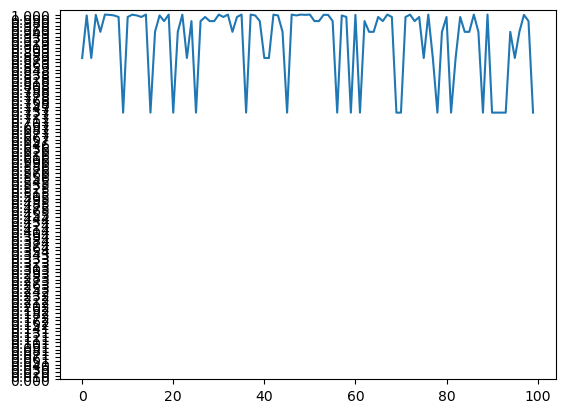

In [58]:
plt.plot(ysig)
plt.yticks(np.linspace(0,1,100))
plt.show()

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score

In [60]:
df = pd.read_csv('housing.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      506 non-null    float64
 1    ZN       506 non-null    float64
 2    INDUS    506 non-null    float64
 3    CHAS     506 non-null    int64  
 4    NOX      506 non-null    float64
 5    RM       506 non-null    float64
 6    AGE      506 non-null    float64
 7    DIS      506 non-null    float64
 8    RAD      506 non-null    int64  
 9    TAX      506 non-null    float64
 10   PTRATIO  506 non-null    float64
 11   B        506 non-null    float64
 12   LSTAT    506 non-null    float64
 13  MEDV      506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [62]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Axes: ylabel='Density'>

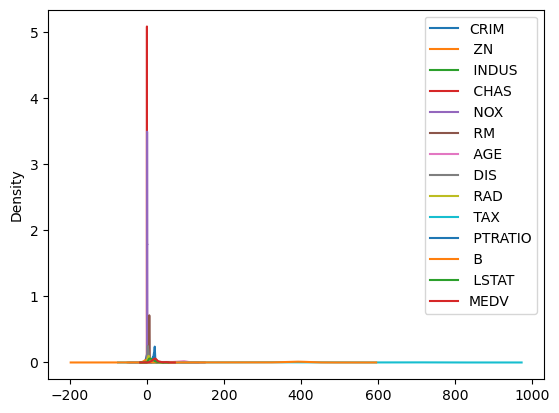

In [63]:
df.plot.kde()

<Axes: ylabel='Density'>

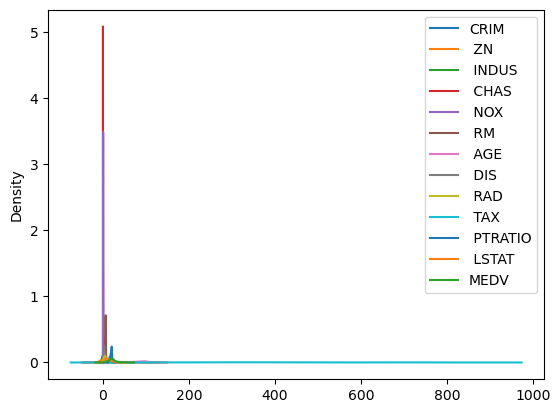

In [64]:
df.drop(columns = [' B']).plot.kde()

In [65]:
X = df.iloc[:,: -1]
y = df.iloc[:,-1]

In [66]:
X_train,X_test ,y_train, y_test = train_test_split(X,y,test_size=0.25,random_state = 25)

In [67]:
Ridge_model = Ridge(alpha = 1)
Ridge_model.fit(X_train,y_train)

Ridge(alpha=1)

In [68]:
sum(Ridge_model.coef_)**2

72.99154266565704

In [69]:
y_pred = Ridge_model.predict(X_test)

In [70]:
print("RMSE Ridge ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 Score Ridge ",r2_score(y_test,y_pred))


RMSE Ridge  4.674233962461419
R2 Score Ridge  0.6942241918572825


In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
print("RMSE LR",np.sqrt(mean_squared_error(y_test,y_pred_lr)))
print("R2 Score LR ",r2_score(y_test,y_pred_lr))

RMSE LR 4.692358054445146
R2 Score LR  0.69184833598645


# Hyper Parameter Tuning

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
para_grid = {'alpha':np.arange(0,1.1,0.1)}
model = Ridge()
search = GridSearchCV(model,para_grid,scoring = 'neg_root_mean_squared_error',cv=5,n_jobs = -1)
results = search.fit(X_train,y_train)

In [76]:
print("Best Score MAE : ",results.best_score_)
print("Best Parm MAE : ",results.best_params_)

Best Score MAE :  -5.0662188161192585
Best Parm MAE :  {'alpha': 0.1}


In [77]:
Ridge = Ridge(alpha = 0.6)
Ridge.fit(X_train,y_train)
y_pred_ridge = Ridge.predict(X_test)
print("RMSE Ridge : ",np.sqrt(mean_squared_error(y_test,y_pred_ridge)))
print("R2 Score Ridge : ",r2_score(y_test,y_pred_ridge))

RMSE Ridge :  4.674153051073489
R2 Score Ridge :  0.6942347777762155


In [79]:
Lasso = Lasso(alpha = 0.6)
Lasso.fit(X_train,y_train)
y_pred_lasso = Lasso.predict(X_test)
print("RMSE Ridge : ",np.sqrt(mean_squared_error(y_test,y_pred_lasso)))
print("R2 Score Ridge : ",r2_score(y_test,y_pred_lasso))

RMSE Ridge :  4.739304686740808
R2 Score Ridge :  0.6856514295944061


In [113]:
ridge_coef= pd.Series(Ridge.coef_,index = X.columns ,name='Ridge')

In [115]:
lasso_coef = pd.Series(Lasso.coef_,index = X.columns,name='Lasso')

In [117]:
lr_coef= pd.Series(lr.coef_,index = X.columns,name='Linear Regression')

In [119]:
coefficients_df = pd.concat([ lr_coef,ridge_coef, lasso_coef], axis=1)

In [121]:
coefficients_df

,Linear Regression,Ridge,Lasso
CRIM,-0.105125,-0.102129,-0.070158
ZN,0.049791,0.051024,0.055934
INDUS,0.062546,0.033831,-0.000000
CHAS,0.613911,0.495325,0.000000
NOX,-19.690529,-13.051361,-0.000000
RM,4.144137,4.190118,2.492793
AGE,-0.003031,-0.009569,0.000000
DIS,-1.516796,-1.425364,-0.945786
RAD,0.312542,0.300982,0.275007
TAX,-0.014505,-0.015094,-0.016805
